<h1><img align="right" src="https://cdn.britannica.com/79/4479-050-6EF87027/flag-Stars-and-Stripes-May-1-1795.jpg" alt="US Flag" width="250">   United States gun violence data </h1>
<h2> Data from: Jan 2013 to Mar 2018 </h2>


Data obtained from the [Gun Violence Data](https://www.kaggle.com/datasets/jameslko/gun-violence-data) set on Kaggle.

***

## Importing packages

In [5]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
# Importing gun violence data set

gun_violence = pd.read_csv('/kaggle/input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv')

## Cleaning the data set

In [7]:
#Removing unnecessary columns
gun_violence_cleaned = gun_violence.drop(['state_senate_district', 
                                         'state_house_district', 
                                         'source_url','participant_name',
                                         'incident_url',
                                         'congressional_district',
                                         'location_description',
                                         'incident_url_fields_missing',
                                         'sources',
                                         'participant_status',
                                         'gun_stolen',
                                         'participant_type',
                                         'participant_age_group',
                                         'participant_age',
                                         'participant_gender',
                                         'participant_relationship'],
                                         axis=1).set_index('incident_id').copy()

In [8]:
# Replacing any values with 'unknown' in the cell with NaN
gun_violence_cleaned['gun_type'] = gun_violence_cleaned['gun_type'].mask(gun_violence_cleaned['gun_type'].str.contains('Unknown', na=False), np.nan)
gun_violence_cleaned['date'] = pd.to_datetime(gun_violence_cleaned['date']) #YYYY-MM-DD

gun_df = gun_violence_cleaned[(gun_violence_cleaned['n_injured'] != 0) | (gun_violence_cleaned['n_killed'] != 0)].copy() #Removing all rows where both fields are 0

***

# Analysis Objectives

> - Where are incidents where people are either <u>**killed**</u> or <u>**injured**</u> occuring?
> - Find the <u>**most dangerous state**</u> for gun crime
> - Find the <u>**city or county**</u> with <u>**most gun crime**</u> in California

***

## Where are the shootings happening?

In [9]:
gun_map = px.scatter_mapbox(gun_df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="city_or_county", 
                        hover_data=["state", "city_or_county"],
                        color_discrete_sequence=["red"],
                        size='n_killed',
                        zoom=2.5, 
                        height=600,
                        width=600)

gun_map.update_layout(mapbox_style="open-street-map")
gun_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
gun_map.show()

***

## Frequency of people <u>*killed*</u> by guns in each state

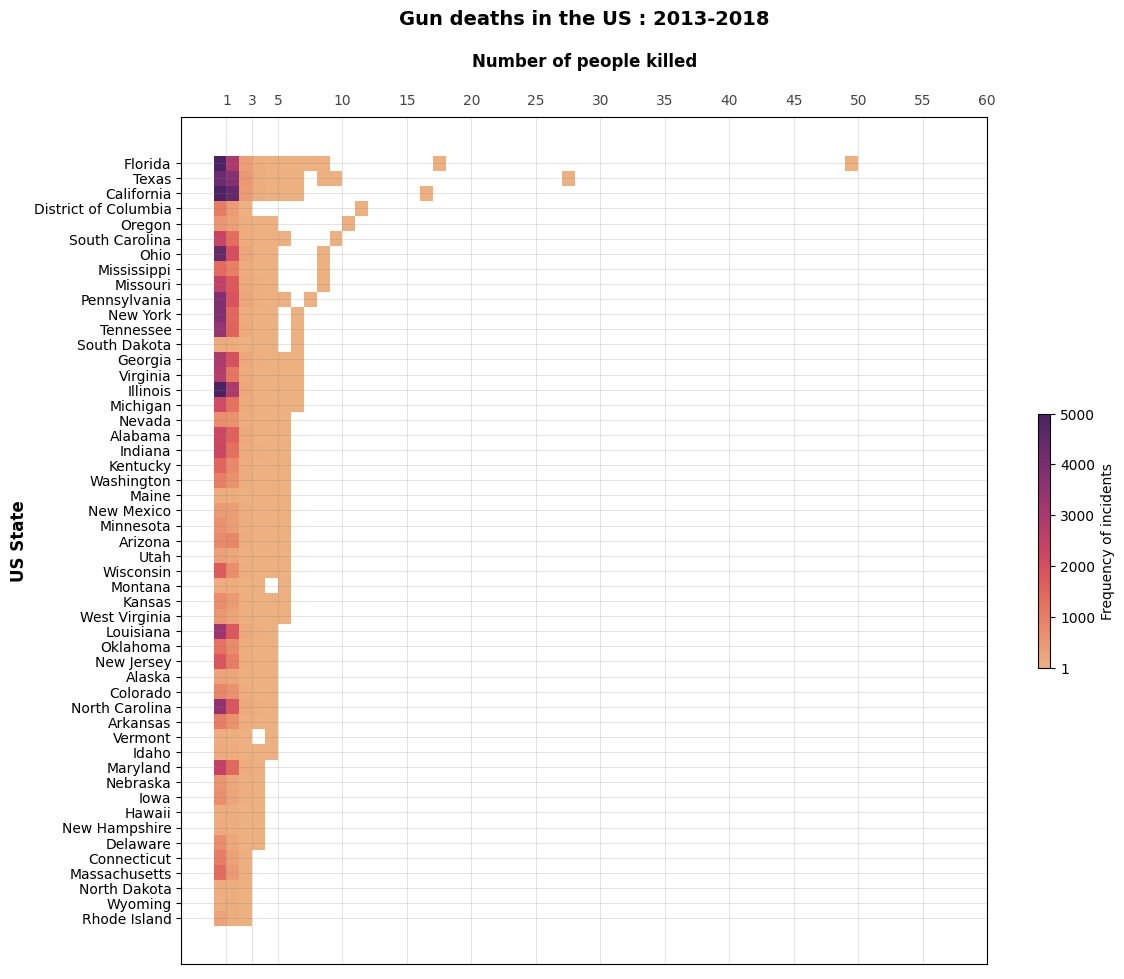

In [10]:
killed_sorted = gun_df.sort_values(by='n_killed', ascending=False)

plt.figure(figsize=(13,11))

sns.histplot(killed_sorted, 
             y="state", 
             x="n_killed", 
             alpha=1, 
             cmap='flare', 
             legend=True, 
             binwidth=1, 
             cbar=True,
             vmax=5000,
             cbar_kws={'shrink': 0.3,'label':'Frequency of incidents', 'ticks': [1,1000,2000,3000,4000,5000]})

plt.tick_params(axis='x', top=True, labeltop=True, labelbottom=False, color='white', width=0.5, labelcolor='#444444')
plt.title('Gun deaths in the US : 2013-2018', pad=20, size=14, fontweight='heavy')
plt.xlabel('Number of people killed', labelpad=-660, size=12, fontweight='heavy')
plt.ylabel('US State', size=12, fontweight='heavy')
plt.grid('major', color='grey', linewidth='0.5', alpha=0.3, drawstyle='default')
plt.xticks([1,3,5,10,15,20,25,30,35,40,45,50,55,60])

plt.show();

## Frequency of volumes of people <u>*injured*</u> by guns in each state

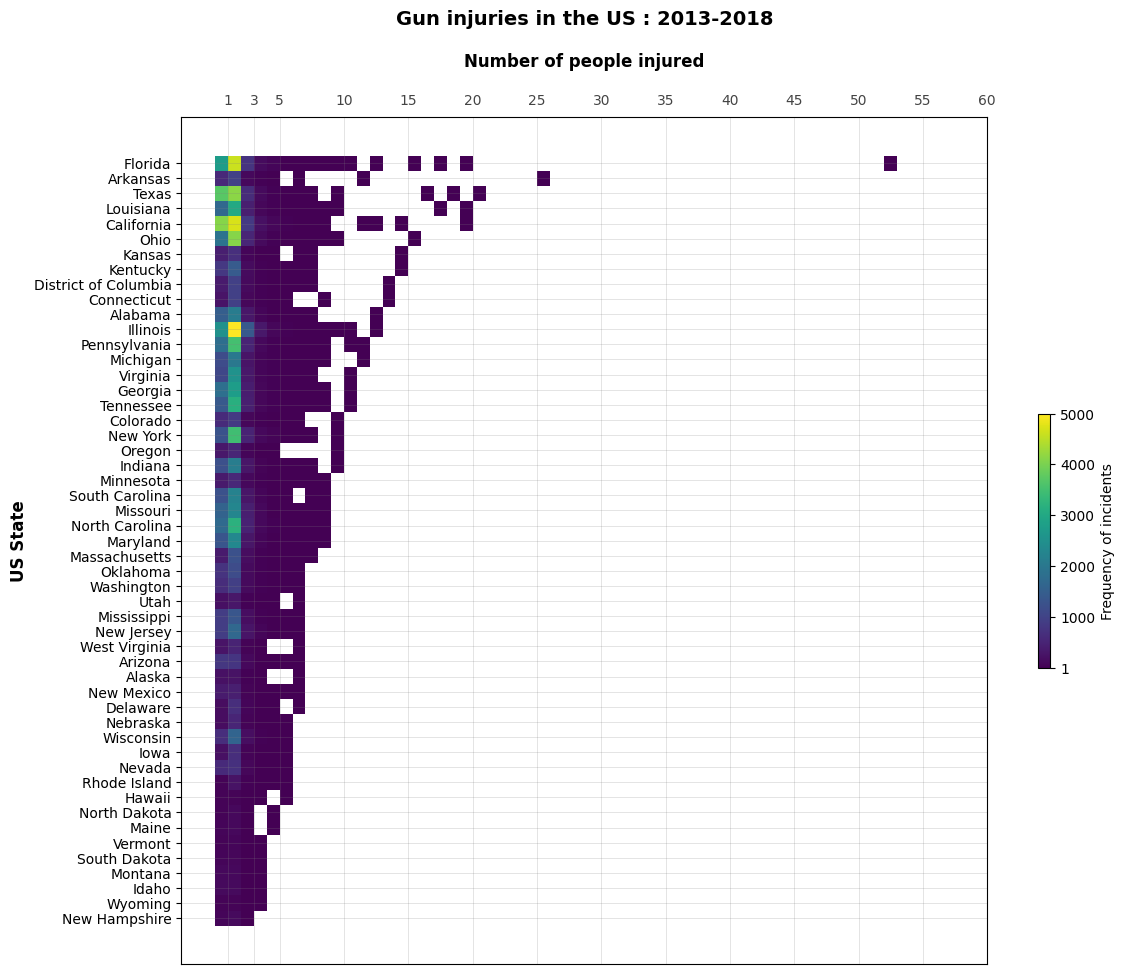

In [11]:
injured_sorted = gun_df.sort_values(by='n_injured', ascending=False)

plt.figure(figsize=(13,11))

sns.histplot(injured_sorted, 
             y="state", 
             x="n_injured", 
             alpha=1, 
             cmap='viridis', 
             legend=True, 
             binwidth=1, 
             cbar=True,
             vmax=5000,
             cbar_kws={'shrink': 0.3,'label':'Frequency of incidents', 'ticks': [1,1000,2000,3000,4000,5000]})

plt.tick_params(axis='x', top=True, labeltop=True, labelbottom=False, color='white', width=0.5, labelcolor='#444444')
plt.title('Gun injuries in the US : 2013-2018', pad=20, size=14, fontweight='heavy')
plt.xlabel('Number of people injured', labelpad=-660, size=12, fontweight='heavy')
plt.ylabel('US State', size=12, fontweight='heavy')
plt.grid('major', color='grey', linewidth='0.5', alpha=0.3, drawstyle='default')
plt.xticks([1,3,5,10,15,20,25,30,35,40,45,50,55,60])

plt.show();

***

<h1><img align="right" src="https://upload.wikimedia.org/wikipedia/commons/0/01/Flag_of_California.svg" alt="US Flag" width="250">   Californian gun violence</h1>
<h2> Jan 2013 to Mar 2018 </h2>


## Aggregating the data

In [12]:
cali_mask = gun_df['state'] == 'California'     # Create a mask where the state is California
cali = gun_df[cali_mask]                        # Apply the mask to variable 'cali'

# Creating separate data frames for killed and injured
cali_killed = cali[['n_killed', 'city_or_county']]
cali_injured = cali[['n_injured', 'city_or_county']]

# Counting volume of killed and injured
cali_killed = cali_killed.groupby(["city_or_county"])['n_killed'].sum().reset_index().sort_values('n_killed', ascending=False)
cali_injured = cali_injured.groupby(["city_or_county"])['n_injured'].sum().reset_index().sort_values('n_injured', ascending=False)

# Joining data sets above into a single dataframe
cali_merged = pd.merge(cali_injured, cali_killed) 
cali_merged['total'] = cali_merged['n_injured'] + cali_merged['n_killed']            # Creating a sum of both columns
cali_final = cali_merged.sort_values(by='total', ascending=False)                    # Sorting dataframe by total 
cali_final.rename(columns={'n_injured':'injured','n_killed':'killed'}, inplace=True) # Renaming columns



## Visualising the top 20 cities or counties in California with most incidents


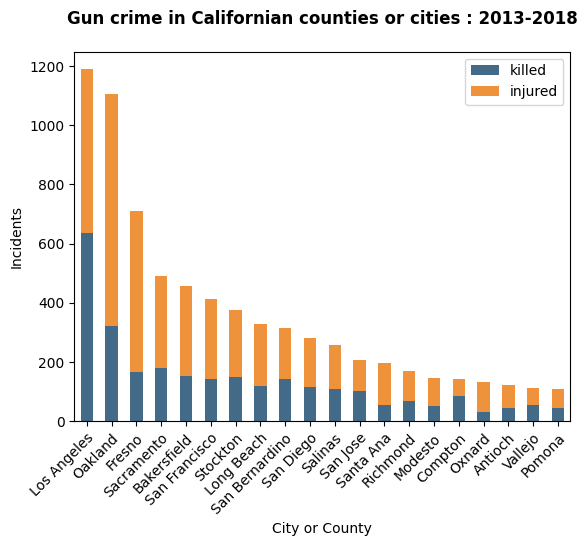

In [13]:
cali_final[0:20].plot(x='city_or_county', 
                      y=['killed', 'injured'], 
                      kind='bar', 
                      stacked=True,
                      color=['#436b88', '#ee923c'])
plt.title('Gun crime in Californian counties or cities : 2013-2018', pad=20, size=12, fontweight='heavy')
plt.xlabel('City or County')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylabel('Incidents');